# <b>Case Study on Taxi Cancellations

###<b> Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from geopy.distance import geodesic

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix


import warnings
warnings.filterwarnings("ignore")



###<b> Loading Data

In [ ]:
df = pd.read_csv("/content/Taxi-cancellation-case.csv")
df.shape

(10000, 19)

In [ ]:
df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/13 22:33,NaN,0,0,1/1/13 8:01,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,1/1/13 12:43,NaN,0,0,1/1/13 9:59,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,1/2/13 0:28,1/3/13 0:00,1,0,1/1/13 12:14,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,1/1/13 13:12,NaN,0,0,1/1/13 12:42,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,1/1/13 16:33,NaN,0,0,1/1/13 15:07,12.926450,77.61206,12.858833,77.589127,0


In [ ]:
df.isnull().sum()

row#                      0
user_id                   0
vehicle_model_id          0
package_id             8248
travel_type_id            0
from_area_id             15
to_area_id             2091
from_city_id           6294
to_city_id             9661
from_date                 0
to_date                4178
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 15
from_long                15
to_lat                 2091
to_long                2091
Car_Cancellation          0
dtype: int64

In [ ]:
df.describe()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,10000.00000,10000.000000,10000.000000,1752.000000,10000.000000,9985.000000,7909.000000,3706.000000,339.000000,10000.000000,10000.00000,9985.000000,9985.000000,7909.000000,7909.000000,10000.000000
mean,5000.50000,30663.966200,26.191700,1.988014,2.141300,709.767752,665.457833,14.898003,68.318584,0.353300,0.04240,12.983301,77.636423,13.026217,77.640752,0.074300
std,2886.89568,10988.599834,27.228053,1.401791,0.434917,418.968918,400.628562,1.190770,49.886427,0.478019,0.20151,0.085659,0.058667,0.113633,0.063522,0.262272
min,1.00000,16.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,4.000000,0.000000,0.00000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,2500.75000,24410.750000,12.000000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.00000,12.927320,77.594800,12.951850,77.587527,0.000000
50%,5000.50000,31510.000000,12.000000,2.000000,2.000000,590.000000,516.000000,15.000000,49.000000,0.000000,0.00000,12.969368,77.635750,12.982750,77.645030,0.000000
75%,7500.25000,39094.500000,24.000000,2.000000,2.000000,1086.000000,1052.000000,15.000000,108.000000,1.000000,0.00000,13.006450,77.687790,13.199560,77.706880,0.000000
max,10000.00000,48729.000000,91.000000,7.000000,3.000000,1401.000000,1403.000000,15.000000,203.000000,1.000000,1.00000,13.366072,77.786420,13.366072,77.786420,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row#                 10000 non-null  int64  
 1   user_id              10000 non-null  int64  
 2   vehicle_model_id     10000 non-null  int64  
 3   package_id           1752 non-null   float64
 4   travel_type_id       10000 non-null  int64  
 5   from_area_id         9985 non-null   float64
 6   to_area_id           7909 non-null   float64
 7   from_city_id         3706 non-null   float64
 8   to_city_id           339 non-null    float64
 9   from_date            10000 non-null  object 
 10  to_date              5822 non-null   object 
 11  online_booking       10000 non-null  int64  
 12  mobile_site_booking  10000 non-null  int64  
 13  booking_created      10000 non-null  object 
 14  from_lat             9985 non-null   float64
 15  from_long            9985 non-null   

####<b>1. How can a predictive model based on these data be used by Yourcabs.com?

- Yes, a predictive model can be built on the data using Machine Learning algorithms like logistic regression, random forest, decision trees, KNN, Naive Bayes, SVM or deep learning neural networks. 
- Here the target variable/feature is Car_Cancellation and all other columns are predictor features/variables.
- So the data obtained from yourcabs.com can be preprocessed and cleaned and all the required transformations can be done on the data and the data can be split into training and test sets.
- One of the machine learning model can be trained on the training data and evaluated on the test data using appropriate metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and PR-AUC.
- Based on the performance of the model, The decision can be made if this predictive model can be used by Yourcabs.com to predict if a booking will be canceled or not.

#### <b> 2. How can a profiling model (identifying predictors that distinguish canceled/uncanceled trips) be used by Yourcabs.com?

A profiling model would require identification of features that are required for analysis so a good EDA is required for the same.
- A profiling model in this case would help in identifying the required predictors that distinguish canceled and uncanceled trips.
- Firstly exploratory data analysis (EDA) is used to visualize the relationship between each predictor variable and the target variable using plots such as box plots, histograms scatter plots, and bar charts.
- Further, feature selection techniques such as correlation analysis, mutual information, chi-square test, or Lasso regularization can be used to identify the important features.
- Thus Based on the above analysis, We can identify the most significant predictors and use them to create a profiling model.
- This information can be used to improve the company's operations by addressing the factors that contribute to trip cancellations. For example, if the model identifies that longer wait times between booking and pickup lead to higher cancellation rates, the company may decide to implement measures to reduce wait times.
- Additionally, the profiling model can be used to identify customer segments that are more likely to cancel trips, allowing the company to target those segments with specific marketing or operational strategies to improve the overall cancellation rate. For instance, if the model reveals that business travelers have a higher cancellation rate than leisure travelers, the company could provide incentives or services that cater to the needs of business travelers, such as priority pickup times or more flexible cancellation policies.
- Overall, a profiling model can provide valuable insights into the factors that contribute to trip cancellations, allowing Yourcabs.com to take targeted actions to reduce cancellations and improve customer satisfaction.

### <b> Data Preprocessing

#### <b> 3. Explore, prepare, and transform the data to facilitate predictive modeling.

- 3.1. Handling Null Values

In [ ]:
df.isnull().sum()

row#                      0
user_id                   0
vehicle_model_id          0
package_id             8248
travel_type_id            0
from_area_id             15
to_area_id             2091
from_city_id           6294
to_city_id             9661
from_date                 0
to_date                4178
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 15
from_long                15
to_lat                 2091
to_long                2091
Car_Cancellation          0
dtype: int64

In [ ]:
# Intially, we will be filling in missing values with zeros
df.fillna(0, inplace=True)

- 3.2. Converting the date and time columns into datetime to ensure they are correct after null value imputation

In [ ]:
# convert dates to datetime objects
df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])

- 3.3. Extracting using information from the date features

In [ ]:
# extract useful information from dates
df['from_hour'] = df['from_date'].dt.hour
df['from_day_of_week'] = df['from_date'].dt.dayofweek
df['from_month'] = df['from_date'].dt.month
df['from_year'] = df['from_date'].dt.year
df['to_hour'] = df['to_date'].dt.hour
df['to_day_of_week'] = df['to_date'].dt.dayofweek
df['to_month'] = df['to_date'].dt.month
df['to_year'] = df['to_date'].dt.year
df['booking_hour'] = df['booking_created'].dt.hour
df['booking_day_of_week'] = df['booking_created'].dt.dayofweek
df['booking_month'] = df['booking_created'].dt.month
df['booking_year'] = df['booking_created'].dt.year

- 3.4. Calculating trip distance from the geographical features using geodesic library

In [ ]:
# calculate trip distance using geodesic distance
def calculate_distance(row):
    start = (row['from_lat'], row['from_long'])
    end = (row['to_lat'], row['to_long'])
    return geodesic(start, end).km

df['trip_length'] = df.apply(calculate_distance, axis=1)

- 3.5. Removing the columns that are not required

In [ ]:
df.columns

Index(['row#', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'from_hour', 'from_day_of_week', 'from_month', 'from_year', 'to_hour',
       'to_day_of_week', 'to_month', 'to_year', 'booking_hour',
       'booking_day_of_week', 'booking_month', 'booking_year', 'trip_length'],
      dtype='object')

In [ ]:
df.head(1)

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,from_year,to_hour,to_day_of_week,to_month,to_year,booking_hour,booking_day_of_week,booking_month,booking_year,trip_length
0,1,17712,12,0.0,2,1021.0,1323.0,0.0,0.0,2013-01-01 22:33:00,...,2013,0,3,1,1970,8,1,1,2013,21.048611


In [ ]:
df = df.drop(['row#','user_id','from_date', 'to_date','booking_created'],axis=1)

- 3.6. Encoding required features

There are several methods to encode the features
- The first method is to use a ordinal encoder but the issue with it would be it would give a certain order to features
- The second method would be to use oen hot encoding but it would increase the cardinality as it would create many features 
- The third way is to use any custom encoding like observing the counts of each feature and taking the top 5 or 10 categories inside each feature in the data

Here we would try to use the get_dummies to perform one hot encoding on the data

In [ ]:
# # extract meaningful features from categorical variables
df = pd.get_dummies(df, columns=['vehicle_model_id', 'from_city_id', 'to_city_id', 'from_area_id', 'to_area_id'])

- 3.7. Splitting data into train and test

In [ ]:

# separate predictors and target variable
X = df.drop(['Car_Cancellation'], axis=1)
y = df['Car_Cancellation']

# perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- 3.8. Handling Class Imbalance

In [ ]:
# checking class imbalance
print(df['Car_Cancellation'].value_counts())

0    9257
1     743
Name: Car_Cancellation, dtype: int64


We can observe that there is class imbalance so there are 2 ways to handle class imbalance - undersampling and oversampling

Undersampling is just using same number of points from both the classes as present in the minority class but this method causes loss of data so the other method is oversampling

Oversampling is a method in which minority class points are ovsersampled such that both the classes have the same number of points, Here we would even try to implement the method of oversampling using  SMOTE.

In [ ]:
# Instantiate the SMOTE algorithm
smote = SMOTE()

# Fit and apply the SMOTE algorithm to the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
y_resampled.value_counts()

0    7406
1    7406
Name: Car_Cancellation, dtype: int64

### <b> Model Building 

#### 4. Fit several predictive models (at least three, such as, KNN,Logistic, Naïve-Bayes; or you can also try decision tree and SVM if you want) of your choice. Do they provide information on how the predictor variables relate to cancellations?

In [ ]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_resampled, y_resampled, cv=5)
print(f"KNN CV Accuracy: {np.mean(knn_scores):.3f} +/- {np.std(knn_scores):.3f}")



KNN CV Accuracy: 0.847 +/- 0.002


In [ ]:

# Fit Logistic Regression model
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg, X_resampled, y_resampled, cv=5)
print(f"Logistic Regression CV Accuracy: {np.mean(logreg_scores):.3f} +/- {np.std(logreg_scores):.3f}")


Logistic Regression CV Accuracy: 0.657 +/- 0.012


In [ ]:

# Fit Naive Bayes model
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_resampled, y_resampled, cv=5)
print(f"Naive Bayes CV Accuracy: {np.mean(nb_scores):.3f} +/- {np.std(nb_scores):.3f}")


Naive Bayes CV Accuracy: 0.533 +/- 0.002


In [ ]:

# Fit Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt, X_resampled, y_resampled, cv=5)
print(f"Decision Tree CV Accuracy: {np.mean(dt_scores):.3f} +/- {np.std(dt_scores):.3f}")


Decision Tree CV Accuracy: 0.894 +/- 0.035


In [ ]:

# Fit Random Forest model
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5)
print(f"Random Forest CV Accuracy: {np.mean(rf_scores):.3f} +/- {np.std(rf_scores):.3f}")

Random Forest CV Accuracy: 0.944 +/- 0.023


The feature importance of the predictor variables can be observed at the end of this file, where the feature importance is plotted.

#### 5. Report the predictive performance of your model on the test set (The confusion matrix, accuracy, precision, recall, ROC-Curve, AUC, Precision-Recall Curve, AP, etc.). How well does the model perform? Can the model be used in practice? (25”)

In [ ]:

# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Fit Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Fit Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Fit Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:

# Report predictive performance
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_knn, y_pred_logreg, y_pred_nb, y_pred_dt, y_pred_rf]

for i, model in enumerate(models):
    y_pred = y_preds[i]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    print(f"---{model} Model---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"Average Precision: {ap:.3f}")
    print(f"True Negatives: {tn}, False Positives: {fp}")
    print(f"False Negatives: {fn}, True Positives: {tp}")
    print("\n")


---KNN Model---
Confusion Matrix:
[[1825   26]
 [ 133   16]]
Accuracy: 0.920
Precision: 0.381
Recall: 0.107
Average Precision: 0.107
True Negatives: 1825, False Positives: 26
False Negatives: 133, True Positives: 16


---Logistic Regression Model---
Confusion Matrix:
[[1849    2]
 [ 149    0]]
Accuracy: 0.924
Precision: 0.000
Recall: 0.000
Average Precision: 0.074
True Negatives: 1849, False Positives: 2
False Negatives: 149, True Positives: 0


---Naive Bayes Model---
Confusion Matrix:
[[1317  534]
 [  58   91]]
Accuracy: 0.704
Precision: 0.146
Recall: 0.611
Average Precision: 0.118
True Negatives: 1317, False Positives: 534
False Negatives: 58, True Positives: 91


---Decision Tree Model---
Confusion Matrix:
[[1743  108]
 [ 118   31]]
Accuracy: 0.887
Precision: 0.223
Recall: 0.208
Average Precision: 0.105
True Negatives: 1743, False Positives: 108
False Negatives: 118, True Positives: 31


---Random Forest Model---
Confusion Matrix:
[[1846    5]
 [ 139   10]]
Accuracy: 0.928
Precisio

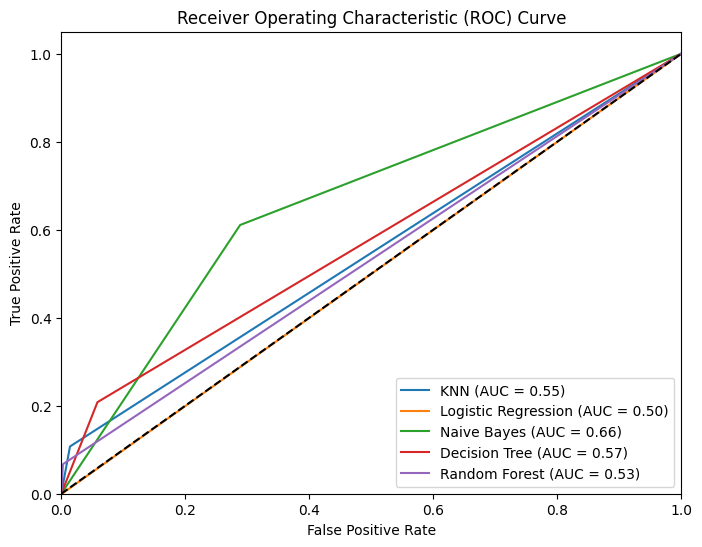

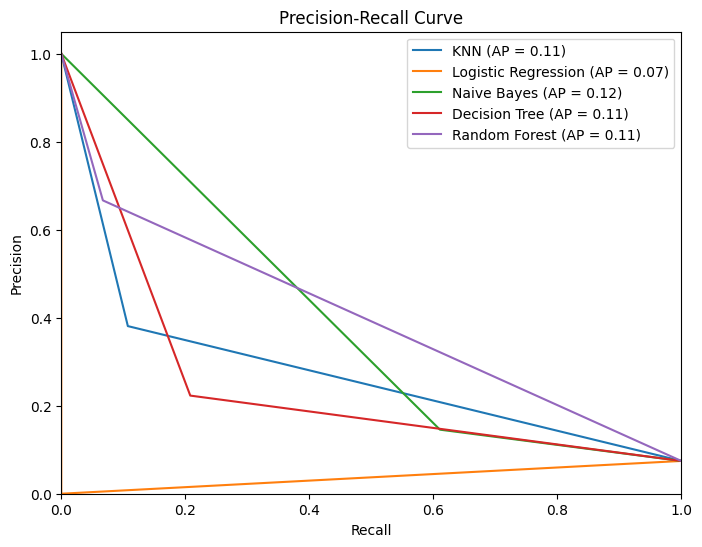

In [ ]:
import matplotlib.pyplot as plt


models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_knn, y_pred_logreg, y_pred_nb, y_pred_dt, y_pred_rf]
classifiers = [knn, logreg, nb, dt, rf]

# Plot ROC curve and compute AUC for each model
plt.figure(figsize=(8,6))
for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(y_test, y_preds[i])
    roc_auc = roc_auc_score(y_test, y_preds[i])
    plt.plot(fpr, tpr, label=f'{models[i]} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve and compute AP for each model
plt.figure(figsize=(8,6))
for i in range(len(models)):
    precision, recall, thresholds = precision_recall_curve(y_test, y_preds[i])
    ap = average_precision_score(y_test, y_preds[i])
    plt.plot(recall, precision, label=f'{models[i]} (AP = {ap:.2f})')
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


- We can observe from the above two plots that Naive bayes has a good AUC and AP value as compared to all other models.

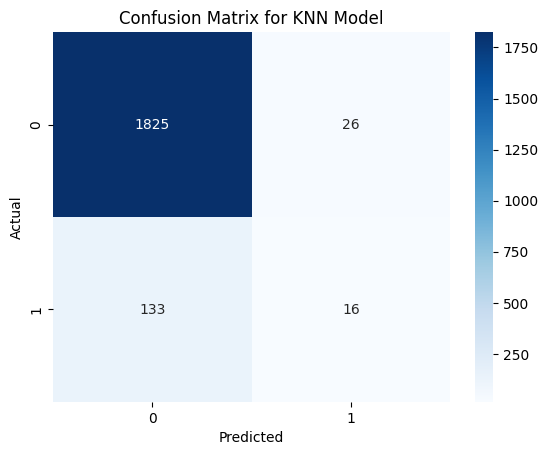

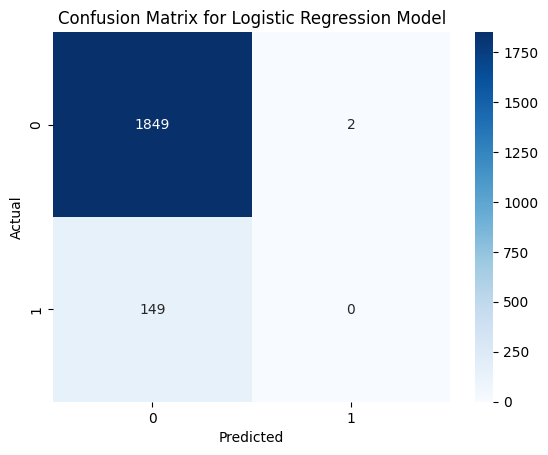

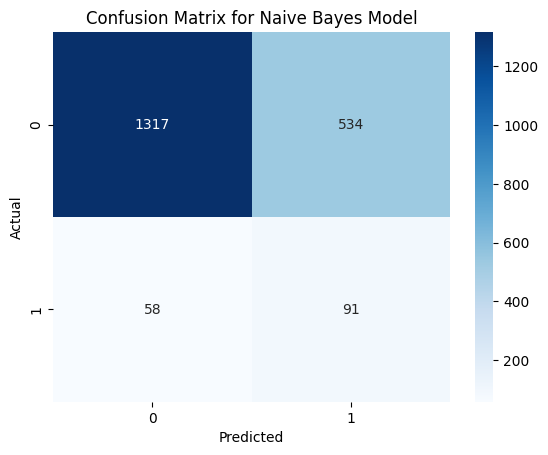

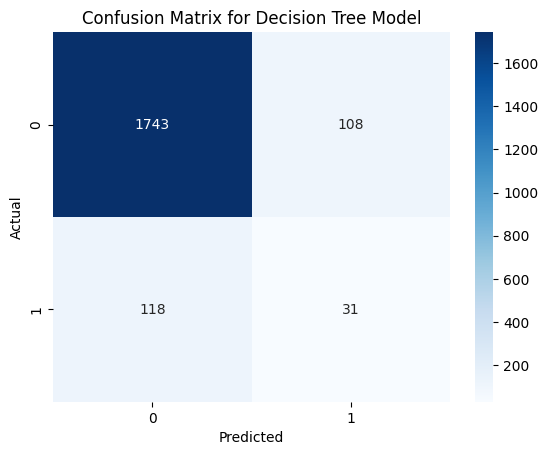

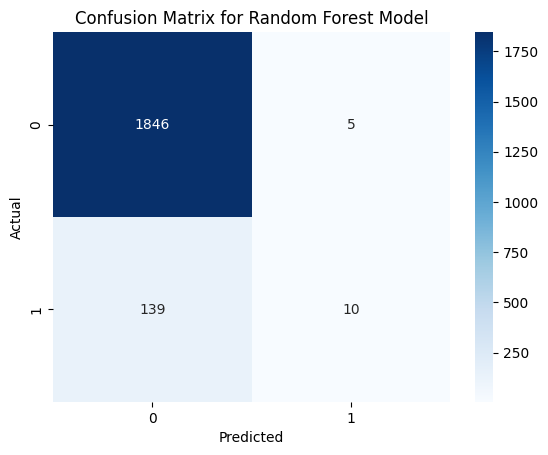

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_knn, y_pred_logreg, y_pred_nb, y_pred_dt, y_pred_rf]

for i in range(len(models)):
    cm = confusion_matrix(y_test, y_preds[i])
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {models[i]} Model')
    plt.show()


- We can also observe from the confusion matrix that Naive Bayes model is best as compared to all the other models, and this model should not be directly used in practise as more correlation analysis is required for the features and the imbalance in data should be handled using SMOTE and models should be trained on the balanced data. Hyperparameter tuning and model validation and sensitivity analysis should be performed before using it in real time.

<b> Feature Importance from Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
# Fit Random Forest model on full training set
rf_model.fit(X_train, y_train)
# Extract feature importance from the random forest model
importances = rf_model.feature_importances_

# Get the feature names from the original dataset
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking can be seen below :")

for f in range(10):  # Print only top 10 features
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))



Feature ranking:
Feature ranking:
1. feature 20 (0.062762) trip_length
2. feature 16 (0.050805) booking_hour
3. feature 8 (0.048257) from_hour
4. feature 4 (0.047955) from_lat
5. feature 5 (0.045088) from_long
6. feature 18 (0.035451) booking_month
7. feature 9 (0.034750) from_day_of_week
8. feature 6 (0.034276) to_lat
9. feature 7 (0.033129) to_long
10. feature 10 (0.031362) from_month


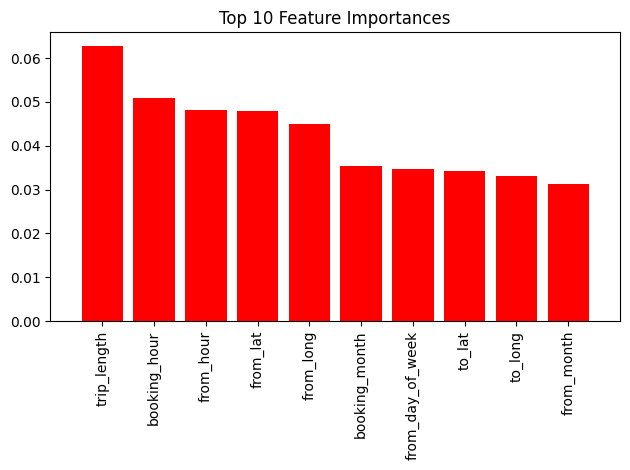

In [ ]:
# Get the top 10 features
top_features = 10
top_indices = indices[:top_features]
top_importances = importances[top_indices]
top_feature_names = feature_names[top_indices]

# Plot the top 10 feature importances
plt.figure()
plt.title("Top 10 Feature Importances")
plt.bar(range(top_features), top_importances, color="r", align="center")
plt.xticks(range(top_features), top_feature_names, rotation=90)
plt.xlim([-1, top_features])
plt.tight_layout()
plt.show()


- Fom the above feature importance plot, we can observe the top features as trip_length, booking_hour, from_hour, from_lat, from_long, booking_month, from_day_of_the_week, to_lat, to_long, from_month.

In [2]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from PIL import Image

# Set up the Chrome options and driver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode (without GUI)
chrome_options.add_argument("--no-sandbox")  # Add this line to fix the "unknown error: cannot find Chrome binary" issue
chrome_options.add_argument("--disable-dev-shm-usage")  # Add this line to fix the "unknown error: cannot find Chrome binary" issue
chrome_options.binary_location = "/usr/bin/google-chrome"  # Specify the path to the Chrome binary

driver = webdriver.Chrome(options=chrome_options)

search_term = "moon"  # Specify the search term

# Iterate over the search result pages (page 1 to 10)
for page in range(1, 11):
    # Create the search URL for the given page
    search_url = f"https://www.google.com/search?q={search_term}&start={10 * (page - 1)}"

    # Open the search URL in the browser
    driver.get(search_url)

    # Capture a screenshot of the entire page
    screenshot_path = f"screenshot_page{page}.png"
    driver.save_screenshot(screenshot_path)

    # Open the screenshot using PIL (optional)
    screenshot = Image.open(screenshot_path)
    screenshot.show()  # Display the screenshot (optional)

# Quit the browser
driver.quit()


WebDriverException: ignored